In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
from scipy import stats
rcParams['font.family'] = 'Arial'
rcParams['legend.numpoints'] = 1

In [2]:
def sele_diff(data, t):
    # Estimating selection differences in the Basic Models, 
    # the Bottleneck Models, and the Expansion Models
    return (np.log(data[1]/(1-data[1]))-np.log(data[2]/(1-data[2])))/t

In [3]:
def sele_diff2(data, t):
    # Estimating selection differences in the Migration Models
    freq1 = data[1] + data[2]
    freq2 = data[3] + data[4]
    return (np.log(freq1/(1-freq1))-np.log(freq2/(1-freq2)))/t

In [4]:
def sele_diff3(data, n1, n2, n3, n4, t):
    # Estimating selection differences in the Substructure Models
    if n2 == 0: # Population 1 has no subpopulations
        freq1 = data[1]
        freq2 = (data[2] * n3 + data[3] * n4) / (n3 + n4)
    elif n4 == 0: # Population 2 has no subpopulations
        freq1 = (data[1] * n1 + data[2] * n2) / (n1 + n2)
        freq2 = data[3]
    else: # Both Population 1 and 2 have subpopulations
        freq1 = (data[1] * n1 + data[2] * n2) / (n1 + n2)
        freq2 = (data[3] * n3 + data[4] * n4) / (n3 + n4)
    return (np.log(freq1/(1-freq1))-np.log(freq2/(1-freq2)))/t

In [5]:
def sele_diff_eur_afr(data, t):
    # Estimating selection differences in the Complex Models
    # between Europeans and Africans
    afr = data[1] + data[2]
    eur = data[3] + data[4]
    return (np.log(eur/(1-eur))-np.log(afr/(1-afr)))/t

In [6]:
def sele_diff_asn_afr(data, t):
    # Estimating selection differences in the Complex Models
    # between East Asians and Africans
    afr = data[1] + data[2]
    asn = data[5] + data[6]
    return (np.log(asn/(1-asn))-np.log(afr/(1-afr)))/t

In [7]:
def sele_diff_eur_asn(data, t):
    # Estimating selection differences in the Complex Models
    # between Europeans and East Asians
    eur = data[3] + data[4]
    asn = data[5] + data[6]
    return (np.log(eur/(1-eur))-np.log(asn/(1-asn)))/t

In [8]:
def sele_diff_eura_afr(data, t):
    # Estimating selection differences in the Complex Models
    # between Eurasians and Africans
    # 34039 is the population size of Europeans after expansion
    # 45852 is the population size of East Asians after expansion
    eura = ((data[3] + data[4]) * 34039 + (data[5] + data[6]) * 45852) / (34039+45852)
    afr = data[1] + data[2]
    return (np.log(eura/(1-eura))-np.log(afr/(1-afr)))/t

In [9]:
# Read data
# The Basic Models: Models 1-17
# Models 1-5: Different magnitudes of selection differences [0, 0.0005, 0.001, 0.0015, 0.002]
Model_1_bm_if_01_t_2000_d_0 = pd.read_csv("BasicModels/Model_1_bm_if_0.1_t_2000_d_0.result", 
                                  header=None, sep="\t")
Model_2_bm_if_01_t_2000_d_0005 = pd.read_csv("BasicModels/Model_2_bm_if_0.1_t_2000_d_0.0005.result", 
                                     header=None, sep="\t")
Model_3_bm_if_01_t_2000_d_001 = pd.read_csv("BasicModels/Model_3_bm_if_0.1_t_2000_d_0.001.result", 
                                    header=None, sep="\t")
Model_4_bm_if_01_t_2000_d_0015 = pd.read_csv("BasicModels/Model_4_bm_if_0.1_t_2000_d_0.0015.result", 
                                     header=None, sep="\t")
Model_5_bm_if_01_t_2000_d_002 = pd.read_csv("BasicModels/Model_5_bm_if_0.1_t_2000_d_0.002.result", 
                                    header=None, sep="\t")

# Models 6-9: Different population size in each population [5000, 20000, 50000, 100000] diploid individuals
Model_6_bm_if_01_n_5000_t_2000_d_0001 = pd.read_csv("BasicModels/Model_6_bm_if_0.1_n_5000_t_2000_d_0.001.result", 
                                            header=None, sep="\t")
Model_7_bm_if_01_n_20000_t_2000_d_0001 = pd.read_csv("BasicModels/Model_7_bm_if_0.1_n_20000_t_2000_d_0.001.result", 
                                             header=None, sep="\t")
Model_8_bm_if_01_n_50000_t_2000_d_0001 = pd.read_csv("BasicModels/Model_8_bm_if_0.1_n_50000_t_2000_d_0.001.result", 
                                             header=None, sep="\t")
Model_9_bm_if_01_n_100000_t_2000_d_0001 = pd.read_csv("BasicModels/Model_9_bm_if_0.1_n_100000_t_2000_d_0.001.result", 
                                              header=None, sep="\t")

# Models 10-13: Different initial frequencies of the beneficial allele [0.01, 0.02, 0.05, 0.2]
Model_10_bm_if_001_t_2000_d_0001 = pd.read_csv("BasicModels/Model_10_bm_if_0.01_t_2000_d_0.001.result", 
                                      header=None, sep="\t")
Model_11_bm_if_002_t_2000_d_0001 = pd.read_csv("BasicModels/Model_11_bm_if_0.02_t_2000_d_0.001.result", 
                                      header=None, sep="\t")
Model_12_bm_if_005_t_2000_d_0001 = pd.read_csv("BasicModels/Model_12_bm_if_0.05_t_2000_d_0.001.result", 
                                      header=None, sep="\t")
Model_13_bm_if_02_t_2000_d_0001 = pd.read_csv("BasicModels/Model_13_bm_if_0.2_t_2000_d_0.001.result", 
                                     header=None, sep="\t")

# Models 14-17: Different divergence times [1000, 3000, 4000, 5000] generations
Model_14_bm_if_01_t_1000_d_0001 = pd.read_csv("BasicModels/Model_14_bm_if_0.1_t_1000_d_0.001.result", 
                                     header=None, sep="\t")
Model_15_bm_if_01_t_3000_d_0001 = pd.read_csv("BasicModels/Model_15_bm_if_0.1_t_3000_d_0.001.result", 
                                     header=None, sep="\t")
Model_16_bm_if_01_t_4000_d_0001 = pd.read_csv("BasicModels/Model_16_bm_if_0.1_t_4000_d_0.001.result", 
                                     header=None, sep="\t")
Model_17_bm_if_01_t_5000_d_0001 = pd.read_csv("BasicModels/Model_17_bm_if_0.1_t_5000_d_0.001.result", 
                                     header=None, sep="\t")

In [10]:
# The Bottleneck Models: Models 18-27
# Models 18-22: Bottleneck in Population 1 with [0.1, 0.3, 0.5, 0.7, 0.9] strength
Model_18_bn_if_01_t_2000_d_0001_p1_f_01 = pd.read_csv("BottleneckModels/Model_18_bn_if_0.1_t_2000_d_0.001_p1_f_0.1.result", 
                                             header=None, sep="\t")
Model_19_bn_if_01_t_2000_d_0001_p1_f_03 = pd.read_csv("BottleneckModels/Model_19_bn_if_0.1_t_2000_d_0.001_p1_f_0.3.result", 
                                             header=None, sep="\t")
Model_20_bn_if_01_t_2000_d_0001_p1_f_05 = pd.read_csv("BottleneckModels/Model_20_bn_if_0.1_t_2000_d_0.001_p1_f_0.5.result", 
                                             header=None, sep="\t")
Model_21_bn_if_01_t_2000_d_0001_p1_f_07 = pd.read_csv("BottleneckModels/Model_21_bn_if_0.1_t_2000_d_0.001_p1_f_0.7.result", 
                                             header=None, sep="\t")
Model_22_bn_if_01_t_2000_d_0001_p1_f_09 = pd.read_csv("BottleneckModels/Model_22_bn_if_0.1_t_2000_d_0.001_p1_f_0.9.result", 
                                             header=None, sep="\t")

# Models 23-27: Bottleneck in Population 2 with [0.1, 0.3, 0.5, 0.7, 0.9] strength
Model_23_bn_if_01_t_2000_d_0001_p2_f_01 = pd.read_csv("BottleneckModels/Model_23_bn_if_0.1_t_2000_d_0.001_p2_f_0.1.result", 
                                             header=None, sep="\t")
Model_24_bn_if_01_t_2000_d_0001_p2_f_03 = pd.read_csv("BottleneckModels/Model_24_bn_if_0.1_t_2000_d_0.001_p2_f_0.3.result", 
                                             header=None, sep="\t")
Model_25_bn_if_01_t_2000_d_0001_p2_f_05 = pd.read_csv("BottleneckModels/Model_25_bn_if_0.1_t_2000_d_0.001_p2_f_0.5.result", 
                                             header=None, sep="\t")
Model_26_bn_if_01_t_2000_d_0001_p2_f_07 = pd.read_csv("BottleneckModels/Model_26_bn_if_0.1_t_2000_d_0.001_p2_f_0.7.result", 
                                             header=None, sep="\t")
Model_27_bn_if_01_t_2000_d_0001_p2_f_09 = pd.read_csv("BottleneckModels/Model_27_bn_if_0.1_t_2000_d_0.001_p2_f_0.9.result", 
                                             header=None, sep="\t")

In [11]:
# The Expansion Models: Models 28-37
# Models 28-32: Expansion in Population 1 with [0.0005, 0.001, 0.0015, 0.002, 0.0025] strength
Model_28_pe_if_01_t_2000_d_0001_p1_a_00005 = pd.read_csv("ExpansionModels/Model_28_pe_if_0.1_t_2000_d_0.001_p1_a_0.0005.result", 
                                                header=None, sep="\t")
Model_29_pe_if_01_t_2000_d_0001_p1_a_0001 = pd.read_csv("ExpansionModels/Model_29_pe_if_0.1_t_2000_d_0.001_p1_a_0.001.result", 
                                                header=None, sep="\t")
Model_30_pe_if_01_t_2000_d_0001_p1_a_00015 = pd.read_csv("ExpansionModels/Model_30_pe_if_0.1_t_2000_d_0.001_p1_a_0.0015.result", 
                                                header=None, sep="\t")
Model_31_pe_if_01_t_2000_d_0001_p1_a_0002 = pd.read_csv("ExpansionModels/Model_31_pe_if_0.1_t_2000_d_0.001_p1_a_0.002.result", 
                                                header=None, sep="\t")
Model_32_pe_if_01_t_2000_d_0001_p1_a_00025 = pd.read_csv("ExpansionModels/Model_32_pe_if_0.1_t_2000_d_0.001_p1_a_0.0025.result", 
                                                header=None, sep="\t")

# Models 33-37: Expansion in Population 2 with [0.0005, 0.001, 0.0015, 0.002, 0.0025] strength
Model_33_pe_if_01_t_2000_d_0001_p2_a_00005 = pd.read_csv("ExpansionModels/Model_33_pe_if_0.1_t_2000_d_0.001_p2_a_0.0005.result", 
                                                header=None, sep="\t")
Model_34_pe_if_01_t_2000_d_0001_p2_a_0001 = pd.read_csv("ExpansionModels/Model_34_pe_if_0.1_t_2000_d_0.001_p2_a_0.001.result", 
                                                header=None, sep="\t")
Model_35_pe_if_01_t_2000_d_0001_p2_a_00015 = pd.read_csv("ExpansionModels/Model_35_pe_if_0.1_t_2000_d_0.001_p2_a_0.0015.result", 
                                                header=None, sep="\t")
Model_36_pe_if_01_t_2000_d_0001_p2_a_0002 = pd.read_csv("ExpansionModels/Model_36_pe_if_0.1_t_2000_d_0.001_p2_a_0.002.result", 
                                                header=None, sep="\t")
Model_37_pe_if_01_t_2000_d_0001_p2_a_00025 = pd.read_csv("ExpansionModels/Model_37_pe_if_0.1_t_2000_d_0.001_p2_a_0.0025.result", 
                                                header=None, sep="\t")

In [12]:
# The Substructure Models: Models 38-46
# Models 38-40: Both Population 1 and 2 have two subpopulations
# Magnitudes of selection differences [0, 0.001, 0.002]
Model_38_ss_if_01_t_2000_p1_2_p2_2_d_0 = pd.read_csv("SubstructureModels/Model_38_ss_if_0.1_t_2000_p1_2_p2_2_d_0.result", 
                                  header=None, sep="\t")
Model_39_ss_if_01_t_2000_p1_2_p2_2_d_0001 = pd.read_csv("SubstructureModels/Model_39_ss_if_0.1_t_2000_p1_2_p2_2_d_0.001.result", 
                                  header=None, sep="\t")
Model_40_ss_if_01_t_2000_p1_2_p2_2_d_0002 = pd.read_csv("SubstructureModels/Model_40_ss_if_0.1_t_2000_p1_2_p2_2_d_0.002.result", 
                                  header=None, sep="\t")

# Models 41-43: Population 1 has no subpopulations, whereas Population 2 has two subpopulations
# Magnitudes of selection differences [0, 0.001, 0.002]
Model_41_ss_if_01_t_2000_p1_1_p2_2_d_0 = pd.read_csv("SubstructureModels/Model_41_ss_if_0.1_t_2000_p1_1_p2_2_d_0.result", 
                                  header=None, sep="\t")
Model_42_ss_if_01_t_2000_p1_1_p2_2_d_0001 = pd.read_csv("SubstructureModels/Model_42_ss_if_0.1_t_2000_p1_1_p2_2_d_0.001.result", 
                                  header=None, sep="\t")
Model_43_ss_if_01_t_2000_p1_1_p2_2_d_0002 = pd.read_csv("SubstructureModels/Model_43_ss_if_0.1_t_2000_p1_1_p2_2_d_0.002.result", 
                                  header=None, sep="\t")

# Models 44-46: Population 1 has two subpopulations, whereas Population 2 has no subpopulations
# Magnitudes of selection differences [0, 0.001, 0.002]
Model_44_ss_if_01_t_2000_p1_2_p2_1_d_0 = pd.read_csv("SubstructureModels/Model_44_ss_if_0.1_t_2000_p1_2_p2_1_d_0.result", 
                                  header=None, sep="\t")
Model_45_ss_if_01_t_2000_p1_2_p2_1_d_0001 = pd.read_csv("SubstructureModels/Model_45_ss_if_0.1_t_2000_p1_2_p2_1_d_0.001.result", 
                                  header=None, sep="\t")
Model_46_ss_if_01_t_2000_p1_2_p2_1_d_0002 = pd.read_csv("SubstructureModels/Model_46_ss_if_0.1_t_2000_p1_2_p2_1_d_0.002.result", 
                                  header=None, sep="\t")

In [13]:
# The Migration Models: Model 47-70
# Models 47-54: Different migration rates [0.00001, 0.00002, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.002]
# The selection difference: 0
Model_47_mg_if_01_t_2000_m_000001_d_0 = pd.read_csv("MigrationModels/Model_47_mg_if_0.1_t_2000_m_0.00001_d_0.result", 
                                          header=None, sep="\t")
Model_48_mg_if_01_t_2000_m_000002_d_0 = pd.read_csv("MigrationModels/Model_48_mg_if_0.1_t_2000_m_0.00002_d_0.result", 
                                          header=None, sep="\t")
Model_49_mg_if_01_t_2000_m_000005_d_0 = pd.read_csv("MigrationModels/Model_49_mg_if_0.1_t_2000_m_0.00005_d_0.result", 
                                          header=None, sep="\t")
Model_50_mg_if_01_t_2000_m_00001_d_0 = pd.read_csv("MigrationModels/Model_50_mg_if_0.1_t_2000_m_0.0001_d_0.result", 
                                          header=None, sep="\t")
Model_51_mg_if_01_t_2000_m_00002_d_0 = pd.read_csv("MigrationModels/Model_51_mg_if_0.1_t_2000_m_0.0002_d_0.result", 
                                          header=None, sep="\t")
Model_52_mg_if_01_t_2000_m_00005_d_0 = pd.read_csv("MigrationModels/Model_52_mg_if_0.1_t_2000_m_0.0005_d_0.result", 
                                          header=None, sep="\t")
Model_53_mg_if_01_t_2000_m_0001_d_0 = pd.read_csv("MigrationModels/Model_53_mg_if_0.1_t_2000_m_0.001_d_0.result", 
                                          header=None, sep="\t")
Model_54_mg_if_01_t_2000_m_0002_d_0 = pd.read_csv("MigrationModels/Model_54_mg_if_0.1_t_2000_m_0.002_d_0.result", 
                                          header=None, sep="\t")

# Models 55-62: Different migration rates [0.00001, 0.00002, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.002]
# The selection difference: 0.001/generation
Model_55_mg_if_01_t_2000_m_000001_d_0001 = pd.read_csv("MigrationModels/Model_55_mg_if_0.1_t_2000_m_0.00001_d_0.001.result", 
                                             header=None, sep="\t")
Model_56_mg_if_01_t_2000_m_000002_d_0001 = pd.read_csv("MigrationModels/Model_56_mg_if_0.1_t_2000_m_0.00002_d_0.001.result", 
                                             header=None, sep="\t")
Model_57_mg_if_01_t_2000_m_000005_d_0001 = pd.read_csv("MigrationModels/Model_57_mg_if_0.1_t_2000_m_0.00005_d_0.001.result", 
                                             header=None, sep="\t")
Model_58_mg_if_01_t_2000_m_00001_d_0001 = pd.read_csv("MigrationModels/Model_58_mg_if_0.1_t_2000_m_0.0001_d_0.001.result", 
                                             header=None, sep="\t")
Model_59_mg_if_01_t_2000_m_00002_d_0001 = pd.read_csv("MigrationModels/Model_59_mg_if_0.1_t_2000_m_0.0002_d_0.001.result", 
                                             header=None, sep="\t")
Model_60_mg_if_01_t_2000_m_00005_d_0001 = pd.read_csv("MigrationModels/Model_60_mg_if_0.1_t_2000_m_0.0005_d_0.001.result", 
                                             header=None, sep="\t")
Model_61_mg_if_01_t_2000_m_0001_d_0001 = pd.read_csv("MigrationModels/Model_61_mg_if_0.1_t_2000_m_0.001_d_0.001.result", 
                                             header=None, sep="\t")
Model_62_mg_if_01_t_2000_m_0002_d_0001 = pd.read_csv("MigrationModels/Model_62_mg_if_0.1_t_2000_m_0.002_d_0.001.result", 
                                             header=None, sep="\t")

# Models 63-70: Different migration rates [0.00001, 0.00002, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.002]
# The selection difference: 0.002/generation
Model_63_mg_if_01_t_2000_m_000001_d_0002 = pd.read_csv("MigrationModels/Model_63_mg_if_0.1_t_2000_m_0.00001_d_0.002.result", 
                                             header=None, sep="\t")
Model_64_mg_if_01_t_2000_m_000002_d_0002 = pd.read_csv("MigrationModels/Model_64_mg_if_0.1_t_2000_m_0.00002_d_0.002.result", 
                                             header=None, sep="\t")
Model_65_mg_if_01_t_2000_m_000005_d_0002 = pd.read_csv("MigrationModels/Model_65_mg_if_0.1_t_2000_m_0.00005_d_0.002.result", 
                                             header=None, sep="\t")
Model_66_mg_if_01_t_2000_m_00001_d_0002 = pd.read_csv("MigrationModels/Model_66_mg_if_0.1_t_2000_m_0.0001_d_0.002.result", 
                                             header=None, sep="\t")
Model_67_mg_if_01_t_2000_m_00002_d_0002 = pd.read_csv("MigrationModels/Model_67_mg_if_0.1_t_2000_m_0.0002_d_0.002.result", 
                                             header=None, sep="\t")
Model_68_mg_if_01_t_2000_m_00005_d_0002 = pd.read_csv("MigrationModels/Model_68_mg_if_0.1_t_2000_m_0.0005_d_0.002.result", 
                                             header=None, sep="\t")
Model_69_mg_if_01_t_2000_m_0001_d_0002 = pd.read_csv("MigrationModels/Model_69_mg_if_0.1_t_2000_m_0.001_d_0.002.result", 
                                             header=None, sep="\t")
Model_70_mg_if_01_t_2000_m_0002_d_0002 = pd.read_csv("MigrationModels/Model_70_mg_if_0.1_t_2000_m_0.002_d_0.002.result", 
                                             header=None, sep="\t")

In [14]:
# The Complex Models: Models 1a-6d
# Different magnitudes of selection differences [0, 0.0001, 0.0002, 0.0005, 0.001, 0.002]
cm_d_0 = pd.read_csv("ComplexModels/cm_d_0.result",header=None, sep="\t")
cm_d_00001 = pd.read_csv("ComplexModels/cm_d_0.0001.result",header=None, sep="\t")
cm_d_00002 = pd.read_csv("ComplexModels/cm_d_0.0002.result",header=None, sep="\t")
cm_d_00005 = pd.read_csv("ComplexModels/cm_d_0.0005.result",header=None, sep="\t")
cm_d_0001 = pd.read_csv("ComplexModels/cm_d_0.001.result",header=None, sep="\t")
cm_d_0002 = pd.read_csv("ComplexModels/cm_d_0.002.result",header=None, sep="\t")

In [15]:
# Estimate selection differences
# The Basic Models
sd_Model_1_bm_if_01_t_2000_d_0 = sele_diff(Model_1_bm_if_01_t_2000_d_0, 2000)
sd_Model_2_bm_if_01_t_2000_d_0005 = sele_diff(Model_2_bm_if_01_t_2000_d_0005, 2000)
sd_Model_3_bm_if_01_t_2000_d_001 = sele_diff(Model_3_bm_if_01_t_2000_d_001, 2000)
sd_Model_4_bm_if_01_t_2000_d_0015 = sele_diff(Model_4_bm_if_01_t_2000_d_0015, 2000)
sd_Model_5_bm_if_01_t_2000_d_002 = sele_diff(Model_5_bm_if_01_t_2000_d_002, 2000)
sd_Model_6_bm_if_01_n_5000_t_2000_d_0001 = sele_diff(Model_6_bm_if_01_n_5000_t_2000_d_0001, 2000)
sd_Model_7_bm_if_01_n_20000_t_2000_d_0001 = sele_diff(Model_7_bm_if_01_n_20000_t_2000_d_0001, 2000)
sd_Model_8_bm_if_01_n_50000_t_2000_d_0001 = sele_diff(Model_8_bm_if_01_n_50000_t_2000_d_0001, 2000)
sd_Model_9_bm_if_01_n_100000_t_2000_d_0001 = sele_diff(Model_9_bm_if_01_n_100000_t_2000_d_0001, 2000)
sd_Model_10_bm_if_001_t_2000_d_0001 = sele_diff(Model_10_bm_if_001_t_2000_d_0001, 2000)
sd_Model_11_bm_if_002_t_2000_d_0001 = sele_diff(Model_11_bm_if_002_t_2000_d_0001, 2000)
sd_Model_12_bm_if_005_t_2000_d_0001 = sele_diff(Model_12_bm_if_005_t_2000_d_0001, 2000)
sd_Model_13_bm_if_02_t_2000_d_0001 = sele_diff(Model_13_bm_if_02_t_2000_d_0001, 2000)
sd_Model_14_bm_if_01_t_1000_d_0001 = sele_diff(Model_14_bm_if_01_t_1000_d_0001, 1000)
sd_Model_15_bm_if_01_t_3000_d_0001 = sele_diff(Model_15_bm_if_01_t_3000_d_0001, 3000)
sd_Model_16_bm_if_01_t_4000_d_0001 = sele_diff(Model_16_bm_if_01_t_4000_d_0001, 4000)
sd_Model_17_bm_if_01_t_5000_d_0001 = sele_diff(Model_17_bm_if_01_t_5000_d_0001, 5000)

In [16]:
# The Bottleneck Models
sd_Model_18_bn_if_01_t_2000_d_0001_p1_f_01 = sele_diff(Model_18_bn_if_01_t_2000_d_0001_p1_f_01, 2000)
sd_Model_19_bn_if_01_t_2000_d_0001_p1_f_03 = sele_diff(Model_19_bn_if_01_t_2000_d_0001_p1_f_03, 2000)
sd_Model_20_bn_if_01_t_2000_d_0001_p1_f_05 = sele_diff(Model_20_bn_if_01_t_2000_d_0001_p1_f_05, 2000)
sd_Model_21_bn_if_01_t_2000_d_0001_p1_f_07 = sele_diff(Model_21_bn_if_01_t_2000_d_0001_p1_f_07, 2000)
sd_Model_22_bn_if_01_t_2000_d_0001_p1_f_09 = sele_diff(Model_22_bn_if_01_t_2000_d_0001_p1_f_09, 2000)
sd_Model_23_bn_if_01_t_2000_d_0001_p2_f_01 = sele_diff(Model_23_bn_if_01_t_2000_d_0001_p2_f_01, 2000)
sd_Model_24_bn_if_01_t_2000_d_0001_p2_f_03 = sele_diff(Model_24_bn_if_01_t_2000_d_0001_p2_f_03, 2000)
sd_Model_25_bn_if_01_t_2000_d_0001_p2_f_05 = sele_diff(Model_25_bn_if_01_t_2000_d_0001_p2_f_05, 2000)
sd_Model_26_bn_if_01_t_2000_d_0001_p2_f_07 = sele_diff(Model_26_bn_if_01_t_2000_d_0001_p2_f_07, 2000)
sd_Model_27_bn_if_01_t_2000_d_0001_p2_f_09 = sele_diff(Model_27_bn_if_01_t_2000_d_0001_p2_f_09, 2000)

In [17]:
# The Expansion Models
sd_Model_28_pe_if_01_t_2000_d_0001_p1_a_00005 = sele_diff(Model_28_pe_if_01_t_2000_d_0001_p1_a_00005, 2000)
sd_Model_29_pe_if_01_t_2000_d_0001_p1_a_0001 = sele_diff(Model_29_pe_if_01_t_2000_d_0001_p1_a_0001, 2000)
sd_Model_30_pe_if_01_t_2000_d_0001_p1_a_00015 = sele_diff(Model_30_pe_if_01_t_2000_d_0001_p1_a_00015, 2000)
sd_Model_31_pe_if_01_t_2000_d_0001_p1_a_0002 = sele_diff(Model_31_pe_if_01_t_2000_d_0001_p1_a_0002, 2000)
sd_Model_32_pe_if_01_t_2000_d_0001_p1_a_00025 = sele_diff(Model_32_pe_if_01_t_2000_d_0001_p1_a_00025, 2000)
sd_Model_33_pe_if_01_t_2000_d_0001_p2_a_00005 = sele_diff(Model_33_pe_if_01_t_2000_d_0001_p2_a_00005, 2000)
sd_Model_34_pe_if_01_t_2000_d_0001_p2_a_0001 = sele_diff(Model_34_pe_if_01_t_2000_d_0001_p2_a_0001, 2000)
sd_Model_35_pe_if_01_t_2000_d_0001_p2_a_00015 = sele_diff(Model_35_pe_if_01_t_2000_d_0001_p2_a_00015, 2000)
sd_Model_36_pe_if_01_t_2000_d_0001_p2_a_0002 = sele_diff(Model_36_pe_if_01_t_2000_d_0001_p2_a_0002, 2000)
sd_Model_37_pe_if_01_t_2000_d_0001_p2_a_00025 = sele_diff(Model_37_pe_if_01_t_2000_d_0001_p2_a_00025, 2000)

In [18]:
# The Substructure Models
sd_Model_38_ss_if_01_t_2000_d_0 = sele_diff3(Model_38_ss_if_01_t_2000_p1_2_p2_2_d_0, 5000, 5000, 5000, 5000, 2000)
sd_Model_39_ss_if_01_t_2000_d_0001 = sele_diff3(Model_39_ss_if_01_t_2000_p1_2_p2_2_d_0001, 5000, 5000, 5000, 5000, 2000)
sd_Model_40_ss_if_01_t_2000_d_0002 = sele_diff3(Model_40_ss_if_01_t_2000_p1_2_p2_2_d_0002, 5000, 5000, 5000, 5000, 2000)
sd_Model_41_ss_if_01_t_2000_p1_1_p2_2_d_0 = sele_diff3(Model_41_ss_if_01_t_2000_p1_1_p2_2_d_0, 10000, 0, 5000, 5000, 2000)
sd_Model_42_ss_if_01_t_2000_p1_1_p2_2_d_0001 = sele_diff3(Model_42_ss_if_01_t_2000_p1_1_p2_2_d_0001, 10000, 0, 5000, 5000, 2000)
sd_Model_43_ss_if_01_t_2000_p1_1_p2_2_d_0002 = sele_diff3(Model_43_ss_if_01_t_2000_p1_1_p2_2_d_0002, 10000, 0, 5000, 5000, 2000)
sd_Model_44_ss_if_01_t_2000_p1_2_p2_1_d_0 = sele_diff3(Model_44_ss_if_01_t_2000_p1_2_p2_1_d_0, 5000, 5000, 10000, 0, 2000)
sd_Model_45_ss_if_01_t_2000_p1_2_p2_1_d_0001 = sele_diff3(Model_45_ss_if_01_t_2000_p1_2_p2_1_d_0001, 5000, 5000, 10000, 0, 2000)
sd_Model_46_ss_if_01_t_2000_p1_2_p2_1_d_0002 = sele_diff3(Model_46_ss_if_01_t_2000_p1_2_p2_1_d_0002, 5000, 5000, 10000, 0, 2000)

In [19]:
# The Migration Models
sd_Model_47_mg_if_01_t_2000_m_000001_d_0 = sele_diff2(Model_47_mg_if_01_t_2000_m_000001_d_0, 2000)
sd_Model_48_mg_if_01_t_2000_m_000002_d_0 = sele_diff2(Model_48_mg_if_01_t_2000_m_000002_d_0, 2000)
sd_Model_49_mg_if_01_t_2000_m_000005_d_0 = sele_diff2(Model_49_mg_if_01_t_2000_m_000005_d_0, 2000)
sd_Model_50_mg_if_01_t_2000_m_00001_d_0 = sele_diff2(Model_50_mg_if_01_t_2000_m_00001_d_0, 2000)
sd_Model_51_mg_if_01_t_2000_m_00002_d_0 = sele_diff2(Model_51_mg_if_01_t_2000_m_00002_d_0, 2000)
sd_Model_52_mg_if_01_t_2000_m_00005_d_0 = sele_diff2(Model_52_mg_if_01_t_2000_m_00005_d_0, 2000)
sd_Model_53_mg_if_01_t_2000_m_0001_d_0 = sele_diff2(Model_53_mg_if_01_t_2000_m_0001_d_0, 2000)
sd_Model_54_mg_if_01_t_2000_m_0002_d_0 = sele_diff2(Model_54_mg_if_01_t_2000_m_0002_d_0, 2000)
sd_Model_55_mg_if_01_t_2000_m_000001_d_0001 = sele_diff2(Model_55_mg_if_01_t_2000_m_000001_d_0001, 2000)
sd_Model_56_mg_if_01_t_2000_m_000002_d_0001 = sele_diff2(Model_56_mg_if_01_t_2000_m_000002_d_0001, 2000)
sd_Model_57_mg_if_01_t_2000_m_000005_d_0001 = sele_diff2(Model_57_mg_if_01_t_2000_m_000005_d_0001, 2000)
sd_Model_58_mg_if_01_t_2000_m_00001_d_0001 = sele_diff2(Model_58_mg_if_01_t_2000_m_00001_d_0001, 2000)
sd_Model_59_mg_if_01_t_2000_m_00002_d_0001 = sele_diff2(Model_59_mg_if_01_t_2000_m_00002_d_0001, 2000)
sd_Model_60_mg_if_01_t_2000_m_00005_d_0001 = sele_diff2(Model_60_mg_if_01_t_2000_m_00005_d_0001, 2000)
sd_Model_61_mg_if_01_t_2000_m_0001_d_0001 = sele_diff2(Model_61_mg_if_01_t_2000_m_0001_d_0001, 2000)
sd_Model_62_mg_if_01_t_2000_m_0002_d_0001 = sele_diff2(Model_62_mg_if_01_t_2000_m_0002_d_0001, 2000)
sd_Model_63_mg_if_01_t_2000_m_000001_d_0002 = sele_diff2(Model_63_mg_if_01_t_2000_m_000001_d_0002, 2000)
sd_Model_64_mg_if_01_t_2000_m_000002_d_0002 = sele_diff2(Model_64_mg_if_01_t_2000_m_000002_d_0002, 2000)
sd_Model_65_mg_if_01_t_2000_m_000005_d_0002 = sele_diff2(Model_65_mg_if_01_t_2000_m_000005_d_0002, 2000)
sd_Model_66_mg_if_01_t_2000_m_00001_d_0002 = sele_diff2(Model_66_mg_if_01_t_2000_m_00001_d_0002, 2000)
sd_Model_67_mg_if_01_t_2000_m_00002_d_0002 = sele_diff2(Model_67_mg_if_01_t_2000_m_00002_d_0002, 2000)
sd_Model_68_mg_if_01_t_2000_m_00005_d_0002 = sele_diff2(Model_68_mg_if_01_t_2000_m_00005_d_0002, 2000)
sd_Model_69_mg_if_01_t_2000_m_0001_d_0002 = sele_diff2(Model_69_mg_if_01_t_2000_m_0001_d_0002, 2000)
sd_Model_70_mg_if_01_t_2000_m_0002_d_0002 = sele_diff2(Model_70_mg_if_01_t_2000_m_0002_d_0002, 2000)

In [20]:
# The Complex Models
# Estimating selection differences between Eurasians adn Africans
# Selection differences [0, 0.0001, 0.0002, 0.0005, 0.001, 0.002]
sd_Model_1a_cm_d_0_eura_afr = sele_diff_eura_afr(cm_d_0, 2040)
sd_Model_2a_cm_d_00001_eura_afr = sele_diff_eura_afr(cm_d_00001, 2040)
sd_Model_3a_cm_d_00002_eura_afr = sele_diff_eura_afr(cm_d_00002, 2040)
sd_Model_4a_cm_d_00005_eura_afr = sele_diff_eura_afr(cm_d_00005, 2040)
sd_Model_5a_cm_d_0001_eura_afr = sele_diff_eura_afr(cm_d_0001, 2040)
sd_Model_6a_cm_d_0002_eura_afr = sele_diff_eura_afr(cm_d_0002, 2040)

# Estimating selection differences between Europeans and Africans
# Selection differences [0, 0.0001, 0.0002, 0.0005, 0.001, 0.002]
sd_Model_1b_cm_d_0_eur_afr = sele_diff_eur_afr(cm_d_0, 2040)
sd_Model_2b_cm_d_00001_eur_afr = sele_diff_eur_afr(cm_d_00001, 2040)
sd_Model_3b_cm_d_00002_eur_afr = sele_diff_eur_afr(cm_d_00002, 2040)
sd_Model_4b_cm_d_00005_eur_afr = sele_diff_eur_afr(cm_d_00005, 2040)
sd_Model_5b_cm_d_0001_eur_afr = sele_diff_eur_afr(cm_d_0001, 2040)
sd_Model_6b_cm_d_0002_eur_afr = sele_diff_eur_afr(cm_d_0002, 2040)

# Estimating selection differences between East Asians and Africans
# Selection differences [0, 0.0001, 0.0002, 0.0005, 0.001, 0.002]
sd_Model_1c_cm_d_0_asn_afr = sele_diff_asn_afr(cm_d_0, 2040)
sd_Model_2c_cm_d_00001_asn_afr = sele_diff_asn_afr(cm_d_00001, 2040)
sd_Model_3c_cm_d_00002_asn_afr = sele_diff_asn_afr(cm_d_00002, 2040)
sd_Model_4c_cm_d_00005_asn_afr = sele_diff_asn_afr(cm_d_00005, 2040)
sd_Model_5c_cm_d_0001_asn_afr = sele_diff_asn_afr(cm_d_0001, 2040)
sd_Model_6c_cm_d_0002_asn_afr = sele_diff_asn_afr(cm_d_0002, 2040)

# Estimating selection differences between Europeans and East Asians
# Selection differences [0, 0, 0, 0, 0, 0]
sd_Model_1d_cm_d_0_eur_asn = sele_diff_eur_asn(cm_d_0, 2040)
sd_Model_2d_cm_d_0_eur_asn = sele_diff_eur_asn(cm_d_00001, 2040)
sd_Model_3d_cm_d_0_eur_asn = sele_diff_eur_asn(cm_d_00002, 2040)
sd_Model_4d_cm_d_0_eur_asn = sele_diff_eur_asn(cm_d_00005, 2040)
sd_Model_5d_cm_d_0_eur_asn = sele_diff_eur_asn(cm_d_0001, 2040)
sd_Model_6d_cm_d_0_eur_asn = sele_diff_eur_asn(cm_d_0002, 2040)

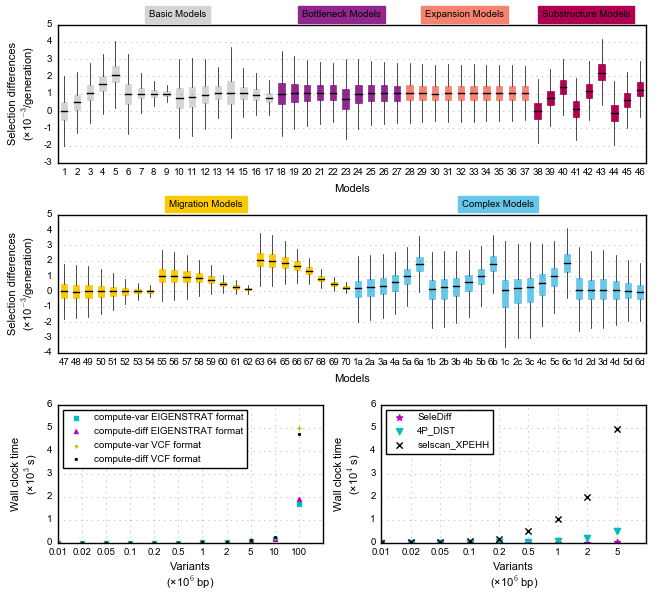

In [21]:
# Figures
fig = plt.figure(figsize = (6.65,6), dpi=300)

medianprops = {'color': 'k', 'linewidth': 1}
boxprops = {'color': 'black', 'linewidth': 0.5}
whiskerprops = {'color': 'k', 'linewidth': 0.5, 'linestyle': '-'}
capprops = {'color': 'k', 'linewidth': 0}

# Plot A: Basic Models, Bottleneck Models, Expansion Models, Substructure Models
ax3 = fig.add_subplot(3, 1, 1)
bp = ax3.boxplot([sd_Model_1_bm_if_01_t_2000_d_0,
             sd_Model_2_bm_if_01_t_2000_d_0005,
             sd_Model_3_bm_if_01_t_2000_d_001,
             sd_Model_4_bm_if_01_t_2000_d_0015,
             sd_Model_5_bm_if_01_t_2000_d_002,
             sd_Model_6_bm_if_01_n_5000_t_2000_d_0001,
             sd_Model_7_bm_if_01_n_20000_t_2000_d_0001,
             sd_Model_8_bm_if_01_n_50000_t_2000_d_0001,
             sd_Model_9_bm_if_01_n_100000_t_2000_d_0001,
             sd_Model_10_bm_if_001_t_2000_d_0001,
             sd_Model_11_bm_if_002_t_2000_d_0001,
             sd_Model_12_bm_if_005_t_2000_d_0001,
             sd_Model_13_bm_if_02_t_2000_d_0001,
             sd_Model_14_bm_if_01_t_1000_d_0001,
             sd_Model_15_bm_if_01_t_3000_d_0001,
             sd_Model_16_bm_if_01_t_4000_d_0001,
             sd_Model_17_bm_if_01_t_5000_d_0001,
             sd_Model_18_bn_if_01_t_2000_d_0001_p1_f_01,
             sd_Model_19_bn_if_01_t_2000_d_0001_p1_f_03,
             sd_Model_20_bn_if_01_t_2000_d_0001_p1_f_05,
             sd_Model_21_bn_if_01_t_2000_d_0001_p1_f_07,
             sd_Model_22_bn_if_01_t_2000_d_0001_p1_f_09,
             sd_Model_23_bn_if_01_t_2000_d_0001_p2_f_01,
             sd_Model_24_bn_if_01_t_2000_d_0001_p2_f_03,
             sd_Model_25_bn_if_01_t_2000_d_0001_p2_f_05,
             sd_Model_26_bn_if_01_t_2000_d_0001_p2_f_07,
             sd_Model_27_bn_if_01_t_2000_d_0001_p2_f_09,
             sd_Model_28_pe_if_01_t_2000_d_0001_p1_a_00005,
             sd_Model_29_pe_if_01_t_2000_d_0001_p1_a_0001,
             sd_Model_30_pe_if_01_t_2000_d_0001_p1_a_00015,
             sd_Model_31_pe_if_01_t_2000_d_0001_p1_a_0002,
             sd_Model_32_pe_if_01_t_2000_d_0001_p1_a_00025,
             sd_Model_33_pe_if_01_t_2000_d_0001_p2_a_00005,
             sd_Model_34_pe_if_01_t_2000_d_0001_p2_a_0001,
             sd_Model_35_pe_if_01_t_2000_d_0001_p2_a_00015,
             sd_Model_36_pe_if_01_t_2000_d_0001_p2_a_0002,
             sd_Model_37_pe_if_01_t_2000_d_0001_p2_a_00025,
             sd_Model_38_ss_if_01_t_2000_d_0, 
             sd_Model_39_ss_if_01_t_2000_d_0001, 
             sd_Model_40_ss_if_01_t_2000_d_0002, 
             sd_Model_41_ss_if_01_t_2000_p1_1_p2_2_d_0, 
             sd_Model_42_ss_if_01_t_2000_p1_1_p2_2_d_0001, 
             sd_Model_43_ss_if_01_t_2000_p1_1_p2_2_d_0002, 
             sd_Model_44_ss_if_01_t_2000_p1_2_p2_1_d_0, 
             sd_Model_45_ss_if_01_t_2000_p1_2_p2_1_d_0001, 
             sd_Model_46_ss_if_01_t_2000_p1_2_p2_1_d_0002,
             ],0,'',patch_artist=True,medianprops=medianprops,
             boxprops=boxprops,capprops=capprops,
             whiskerprops=whiskerprops)
ax3.set_yticklabels([-3, -2, -1, 0, 1, 2, 3, 4, 5])
ax3.set_ylabel("Selection differences\n(×10$^{-3}$/generation)", size=8)
ax3.set_xlabel("Models", size=8)
ax3.tick_params(labelsize=7, size=0)
for i in range(17):
    plt.setp(bp['boxes'][i], color='#D4D4D4')
for i in range(10):
    plt.setp(bp['boxes'][i+17], color='#91278F')
for i in range(10):
    plt.setp(bp['boxes'][i+27], color='#F68370')
for i in range(9):
    plt.setp(bp['boxes'][i+37], color='#B00051')
ax3.yaxis.grid(alpha=0.3)
plt.figtext(0.23, 0.98, 'Basic Models',
            backgroundcolor='#D4D4D4',color='black',
            weight='roman',size='x-small')
plt.figtext(0.46, 0.98, 'Bottleneck Models',
            backgroundcolor='#91278F',color='black',
            weight='roman',size='x-small')
plt.figtext(0.645, 0.98, 'Expansion Models',
            backgroundcolor='#F68370',color='black',
            weight='roman',size='x-small')
plt.figtext(0.82, 0.98, 'Substructure Models',
            backgroundcolor='#B00051',color='black',
            weight='roman',size='x-small')

# Plot B: Migration Models, Complex Models
ax4 = fig.add_subplot(3, 1, 2)
bp = ax4.boxplot([sd_Model_47_mg_if_01_t_2000_m_000001_d_0,
             sd_Model_48_mg_if_01_t_2000_m_000002_d_0,
             sd_Model_49_mg_if_01_t_2000_m_000005_d_0,
             sd_Model_50_mg_if_01_t_2000_m_00001_d_0,
             sd_Model_51_mg_if_01_t_2000_m_00002_d_0,
             sd_Model_52_mg_if_01_t_2000_m_00005_d_0,
             sd_Model_53_mg_if_01_t_2000_m_0001_d_0,
             sd_Model_54_mg_if_01_t_2000_m_0002_d_0,
             sd_Model_55_mg_if_01_t_2000_m_000001_d_0001,
             sd_Model_56_mg_if_01_t_2000_m_000002_d_0001,
             sd_Model_57_mg_if_01_t_2000_m_000005_d_0001,
             sd_Model_58_mg_if_01_t_2000_m_00001_d_0001,
             sd_Model_59_mg_if_01_t_2000_m_00002_d_0001,
             sd_Model_60_mg_if_01_t_2000_m_00005_d_0001,
             sd_Model_61_mg_if_01_t_2000_m_0001_d_0001,
             sd_Model_62_mg_if_01_t_2000_m_0002_d_0001,
             sd_Model_63_mg_if_01_t_2000_m_000001_d_0002,
             sd_Model_64_mg_if_01_t_2000_m_000002_d_0002,
             sd_Model_65_mg_if_01_t_2000_m_000005_d_0002,
             sd_Model_66_mg_if_01_t_2000_m_00001_d_0002,
             sd_Model_67_mg_if_01_t_2000_m_00002_d_0002,
             sd_Model_68_mg_if_01_t_2000_m_00005_d_0002,
             sd_Model_69_mg_if_01_t_2000_m_0001_d_0002,
             sd_Model_70_mg_if_01_t_2000_m_0002_d_0002,
             sd_Model_1a_cm_d_0_eura_afr,
             sd_Model_2a_cm_d_00001_eura_afr,
             sd_Model_3a_cm_d_00002_eura_afr,
             sd_Model_4a_cm_d_00005_eura_afr,
             sd_Model_5a_cm_d_0001_eura_afr,
             sd_Model_6a_cm_d_0002_eura_afr,
             sd_Model_1b_cm_d_0_eur_afr,
             sd_Model_2b_cm_d_00001_eur_afr,
             sd_Model_3b_cm_d_00002_eur_afr,
             sd_Model_4b_cm_d_00005_eur_afr,
             sd_Model_5b_cm_d_0001_eur_afr,
             sd_Model_6b_cm_d_0002_eur_afr,
             sd_Model_1c_cm_d_0_asn_afr,
             sd_Model_2c_cm_d_00001_asn_afr,
             sd_Model_3c_cm_d_00002_asn_afr,
             sd_Model_4c_cm_d_00005_asn_afr,
             sd_Model_5c_cm_d_0001_asn_afr,
             sd_Model_6c_cm_d_0002_asn_afr,
             sd_Model_1d_cm_d_0_eur_asn,
             sd_Model_2d_cm_d_0_eur_asn,
             sd_Model_3d_cm_d_0_eur_asn,
             sd_Model_4d_cm_d_0_eur_asn,
             sd_Model_5d_cm_d_0_eur_asn,
             sd_Model_6d_cm_d_0_eur_asn,
             ],0,'',patch_artist=True,medianprops=medianprops,
             boxprops=boxprops,capprops=capprops,
             whiskerprops=whiskerprops)
ax4.set_yticklabels([-4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax4.set_xticklabels([47, 48, 49, 50, 51, 
                     52, 53, 54, 55, 56,
                     57, 58, 59, 60, 61,
                     62, 63, 64, 65, 66,
                     67, 68, 69, 70, '1a',
                     '2a', '3a', '4a', '5a', '6a',
                     '1b', '2b', '3b', '4b', '5b',
                     '6b', '1c', '2c', '3c', '4c',
                     '5c', '6c', '1d', '2d', '3d',
                     '4d', '5d', '6d'])
ax4.tick_params(labelsize=7, size=0)
ax4.set_ylabel("Selection differences\n(×10$^{-3}$/generation)", size=8)
ax4.set_xlabel("Models", size=8)
for i in range(24):
    plt.setp(bp['boxes'][i], color='#FBCA03')
for i in range(24):
    plt.setp(bp['boxes'][i+24], color='#67C7EB')
ax4.yaxis.grid(alpha=0.3)
plt.figtext(0.26, 0.664, 'Migration Models',
            backgroundcolor='#FBCA03',color='black',
            weight='roman',size='x-small')
plt.figtext(0.7, 0.664, 'Complex Models',
            backgroundcolor='#67C7EB',color='black',
            weight='roman',size='x-small')

# Plot C: Wall clock times of SeleDiff with different sizes of variants
ax1 = fig.add_subplot(3, 2, 5)
var_eigen_times = [0.37, 0.58, 1.13, 2.17, 4.18, 9.77, 17.67, 33.66, 79.56, 163.61, 1706.04]
diff_eigen_times = [0.74, 0.9, 1.55, 2.63, 4.76, 10.61, 19.86, 37.9, 90.52, 172.00, 1917.21]

var_vcf_times = [0.48, 0.63, 1.20, 2.17, 5.22, 11.50, 25.74, 40.87, 101.87, 217.63, 4995.33]
diff_vcf_times = [0.93, 1.00, 1.58, 2.78, 4.56, 12.51, 26.59, 47.53, 106.97, 257.75, 4716.33]

variants = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 100]
scaled_variants = np.arange(len(variants))

ax1.scatter(scaled_variants, var_eigen_times, color='c', marker='s', 
            s=7, label='compute-var EIGENSTRAT format')
ax1.scatter(scaled_variants, diff_eigen_times, color='m', marker='^', 
            s=7, label='compute-diff EIGENSTRAT format')
ax1.scatter(scaled_variants, var_vcf_times, color='y', marker='+', 
            s=8, label='compute-var VCF format')
ax1.scatter(scaled_variants, diff_vcf_times, color='k', marker='.', 
            s=7, label='compute-diff VCF format')

ax1.set_xlim([0, 11])
ax1.set_ylim([0, 6000])
ax1.set_yticklabels([0, 1, 2, 3, 4, 5, 6])
ax1.set_xticklabels(variants)
ax1.tick_params(labelsize=7, size=0)
ax1.xaxis.set_ticks(np.arange(0, 12, 1))
plt.xlabel('Variants\n(×10$^{6}$ bp)', size=8)
plt.ylabel('Wall clock time\n(×10$^{3}$ s)', size=8)
plt.grid(True, alpha=0.3)
plt.legend(scatterpoints=1, loc='upper left', prop={'size': 7})

variants = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5]
selediff_times = [1.41, 1.64, 2.79, 4.95, 9.79, 24.02, 52.33, 88.4, 208.84]
fst_times = [7.43, 15.30, 42.12, 91.53, 198.28, 455.97, 979.66, 2147.17, 5136.68]
xpehh_times = [82.72, 168.90, 426.41, 883.39, 1853.08, 4916.62, 10282.01, 19776, 49342.74]
scaled_variants = np.arange(len(variants))

# Plot D: Speed comparison
ax2 = fig.add_subplot(3, 2, 6)
ax2.scatter(scaled_variants, selediff_times, color='m', label='SeleDiff', marker="*")
ax2.scatter(scaled_variants, fst_times, color='c', label='4P_DIST', marker="v")
ax2.scatter(scaled_variants, xpehh_times, color='k', label='selscan_XPEHH', marker="x")
ax2.set_xlim([0, 9])
ax2.set_ylim([0, 60000])
ax2.set_yticklabels([0, 1, 2, 3, 4, 5, 6])
ax2.set_xticklabels(variants)
ax2.tick_params(labelsize=7, size=0)
ax2.xaxis.set_ticks(np.arange(0, 10, 1))
plt.xlabel('Variants\n(×10$^{6}$ bp)', size=8)
plt.ylabel('Wall clock time\n(×10$^{4}$ s)', size=8)
plt.grid(True, alpha=0.3)
plt.legend(scatterpoints=1, loc='upper left', prop={'size': 7})

fig.tight_layout()
pp = PdfPages("SeleDiff-Figure1.pdf")
pp.savefig(fig)
pp.close()
plt.show()

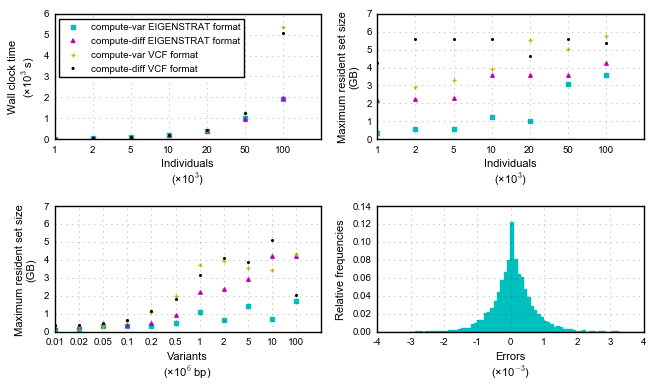

In [22]:
# Supplementary Figures
fig = plt.figure(figsize = (6.65,4), dpi=300)

inds = [1, 2, 5, 10, 20, 50, 100]
var_ind_eigen_times = [18.25, 39.45, 91.10, 185.33, 383.62, 998.82, 1908.14]
diff_ind_eigen_times = [23.57, 44.85, 98.72, 192.83, 404.94, 984.93, 1961.19]

var_ind_vcf_times = [16.67, 37.48, 89.05, 221.79, 416.21, 1249.33, 5384.67]
diff_ind_vcf_times = [18.86, 41.83, 96.15, 211.84, 441.69, 1260.55, 5072]

var_ind_eigen_mem = [0.33, 0.57, 0.59, 1.27, 1.02, 3.07, 3.56]
diff_ind_eigen_mem = [2.20, 2.25, 2.28, 3.56, 3.56, 3.57, 4.26]

var_ind_vcf_mem = [0.33, 2.93, 3.31, 3.90, 5.56, 5.03, 5.76]
diff_ind_vcf_mem = [4.25, 5.59, 5.59, 5.6, 4.62, 5.59, 5.36]
scaled_inds = np.arange(len(inds))

# Plot A: Wall clock time of SeleDiff with different numbers of individuals
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(scaled_inds, var_ind_eigen_times, color='c', marker='s', 
            s=6, label='compute-var EIGENSTRAT format')
ax1.scatter(scaled_inds, diff_ind_eigen_times, color='m', marker='^', 
            s=6, label='compute-diff EIGENSTRAT format')
ax1.scatter(scaled_inds, var_ind_vcf_times, color='y', marker='+', 
            s=8, label='compute-var VCF format')
ax1.scatter(scaled_inds, diff_ind_vcf_times, color='k', marker='.', 
            s=6, label='compute-diff VCF format')
ax1.set_xlim([0, 7])
ax1.set_ylim([0, 6000])
ax1.set_yticklabels([0, 1, 2, 3, 4, 5, 6])
ax1.set_xticklabels(inds)
ax1.xaxis.set_ticks(np.arange(0, 8, 1))
ax1.tick_params(labelsize=7, size=0)
plt.xlabel('Individuals\n(×10$^{3}$)', size=8)
plt.ylabel('Wall clock time\n(×10$^{3}$ s)', size=8)
plt.grid(True, alpha=0.3)
plt.legend(scatterpoints=1, loc='upper left', prop={'size': 7})

# Plot B: Memory usage of SeleDiff with different numbers of individuals
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(scaled_inds, var_ind_eigen_mem, color='c', marker='s', 
            s=6, label='compute-var EIGENSTRAT format')
ax2.scatter(scaled_inds, diff_ind_eigen_mem, color='m', marker='^', 
            s=6, label='compute-diff EIGENSTRAT format')
ax2.scatter(scaled_inds, var_ind_vcf_mem, color='y', marker='+', 
            s=8, label='compute-var VCF format')
ax2.scatter(scaled_inds, diff_ind_vcf_mem, color='k', marker='.', 
            s=6, label='compute-diff VCF format')
ax2.tick_params(labelsize=7, size=0)
ax2.set_xlim([0, 7])
ax2.set_ylim([0, 7])
ax2.set_xticklabels(inds)
ax2.xaxis.set_ticks(np.arange(0, 8, 1))
ax2.tick_params(labelsize=7, size=0)
plt.xlabel('Individuals\n(×10$^{3}$)', size=8)
plt.ylabel('Maximum resident set size\n(GB)', size=8)
plt.grid(True, alpha=0.3)

# Plot C: Memory usage of SeleDiff with different sizes of variants
ax3 = fig.add_subplot(2, 2, 3)
variants = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 100]
var_variant_eigen_mem = [0.12, 0.17, 0.31, 0.32, 0.33, 0.51, 1.09, 0.68, 1.45, 0.72, 1.7]
diff_variant_eigen_mem = [0.25, 0.30, 0.37, 0.39, 0.47, 0.91, 2.20, 2.36, 2.96, 4.25, 4.25]
var_variant_vcf_mem = [0.24, 0.32, 0.33, 0.58, 1.10, 1.99, 3.70, 3.96, 3.57, 3.47, 4.36]
diff_variant_vcf_mem = [0.36, 0.37, 0.50, 0.65, 1.16, 1.84, 3.17, 4.11, 3.89, 5.14, 2.04]
scaled_variants = np.arange(len(variants))
ax3.scatter(scaled_variants, var_variant_eigen_mem, color='c', marker='s', 
            s=6, label='compute-var EIGENSTRAT format')
ax3.scatter(scaled_variants, diff_variant_eigen_mem, color='m', marker='^', 
            s=6, label='compute-diff EIGENSTRAT format')
ax3.scatter(scaled_variants, var_variant_vcf_mem, color='y', marker='+', 
            s=8, label='compute-var VCF format')
ax3.scatter(scaled_variants, diff_variant_vcf_mem, color='k', marker='.', 
            s=6, label='compute-diff VCF format')
ax3.tick_params(labelsize=7, size=0)
ax3.set_xlim([0, 11])
ax3.set_ylim([0, 7])
ax3.xaxis.set_ticks(np.arange(0, 12, 1))
ax3.tick_params(labelsize=7, size=0)
ax3.set_xticklabels(variants)
plt.xlabel('Variants\n(×10$^{6}$ bp)', size=8)
plt.ylabel('Maximum resident set size\n(GB)', size=8)
plt.grid(True, alpha=0.3)

# Plot D: Accuracy of t-digest
ax4 = fig.add_subplot(2, 2, 4)
medians = pd.read_csv("tDigestMedians.txt", header=None)
res = stats.relfreq(medians, numbins=100)
x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size, res.frequency.size)
ax4.bar(x, res.frequency, width=res.binsize, edgecolor="c", color="c")
ax4.set_xlim([-0.004, 0.004])
ax4.set_xticklabels([-4, -3, -2, -1, 0, 1, 2, 3, 4])
ax4.tick_params(labelsize=7, size=0)
plt.xlabel('Errors\n(×10$^{-3}$)', size=8)
plt.ylabel('Relative frequencies', size=8)
plt.grid(True, alpha=0.3)

fig.tight_layout()
pp = PdfPages("SeleDiff-Suppl-Figures.pdf")
pp.savefig(fig)
pp.close()
plt.show()